# Simple Linear Regression using OLS

Ordinary least squares (OLS) regression is a statistical method that produces the one straight line that minimizes the total squared error. It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line.

Here is the equation of a simple linear regression.
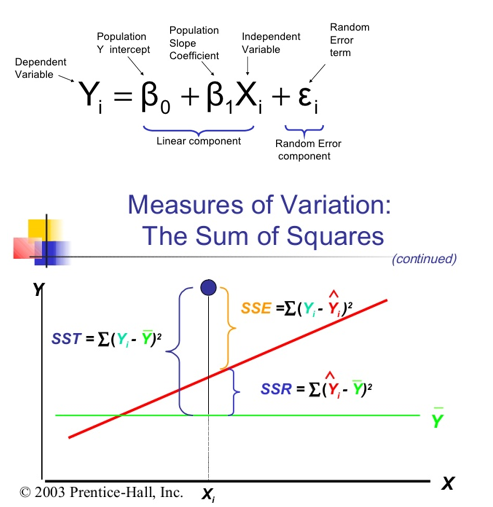

**SSE (Sum of Squared Error/Residue):** Sum of squared difference between the actual value of y and predicted value of y.

**SSR (Sum of Squared Regression):** Sum of squared difference between the predicted value of y and the population mean.

**SST (Sum of Squared Total):** Sum of SSE and SSR.

The best line is the one whose SSE is minimum.

**Error/Residue:** e = actual value of y - predicted value of y =  yi - ycap = yi - (m.xi + c)

**Cost function (SSE):** Σe2 = Σ(yi – (m.xi + c))2

How best the regression line fits our data is determined by coefficient of determination (r2).

**Coefficient of determination (r2)** = SSR / SST

Interpretation of r2:
* It is the proportion of variance in indepdendent variables to variance in dependent variable.
* It tells us the amount of variation in our dependent variable that is explained by the independent variables.
* It is a measure of how close the points are to the regression line.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats as sms
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# creating dataframe
df = pd.read_csv("C:/Users/shara/Desktop/GreatLearning/Week6-SupervisedML-Regression/Datasets/airline cost new.csv")

print("Dataframe dimensions: {} Rows, {} Columns".format(*df.shape))

Dataframe dimensions: 49 Rows, 2 Columns


## Building OLS model

In [3]:
# splitting data into dependent and independent variables
X = df["num_pass"]
y = df["cost"]

# adding constant to our dataframe
Xc = sm.add_constant(X)

# creating train and test data
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.33, random_state=42)

C:\DataScience\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [4]:
# creating OLS model
model_lr = sm.OLS(y_train,X_train).fit()

# predicting dependent variable
y_pred = model_lr.predict(X_test)

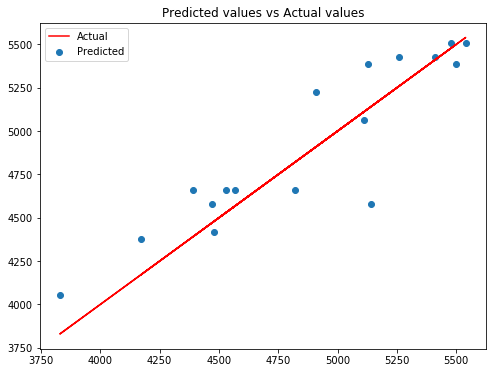

In [5]:
# plotting predicted values against actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, label="Predicted")
plt.plot(y_test, y_test, color='r', label="Actual")
plt.title("Predicted values vs Actual values")
plt.legend()
plt.show()

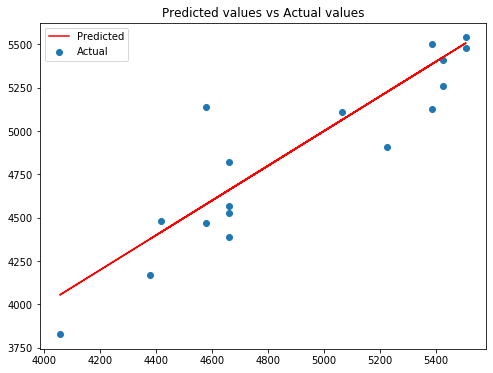

In [10]:
# plotting predicted values against actual values
plt.figure(figsize=(8,6))
plt.scatter(y_pred,y_test, label="Actual")
plt.plot(y_pred, y_pred, color='r', label="Predicted")
plt.title("Predicted values vs Actual values")
plt.legend()
plt.show()

In [6]:
# model summary
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     237.4
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           8.58e-16
Time:                        20:07:44   Log-Likelihood:                -208.19
No. Observations:                  32   AIC:                             420.4
Df Residuals:                      30   BIC:                             423.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1594.7230    208.920      7.633      0.000    1168.051    2021.395
num_pass      40.3358      2.618     15.407      0.000      34.989      45.682
==============================================================================
Omnibus:                        8.570   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                2.255
Skew:                          -0.027   Prob(JB):                        0.324
Kurtosis:                       1.701   Cond. No.                         564.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation of the summary of OLS model

**First Table: Information about model fit**

The left part of the first table provides basic information about the model fit:
* **Dep. Variable:** Singular. Variable of interets of the model.
* **Model:** Technique used. Abbreviation of the **Method**.
* **Method:** Method used to calculate/selecting the parameters (coefs). *Least Squares* since it picks the parameters that reduce the training error. 
* **No. Observations:** Number of observations used by our model. Size of the data.
* **Df Residuals:** Degrees of freedom of the residuals. Number of observations - Number of parameters. Here constant/intercept is also a parameter.
* **Df Model:** Degrees of freedom of model. Number of parameters in the model (not including the constant/intercept).
* **Covariance Type:** Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process. Since this model is *Ordinary Least Squares*, it is non-robust and therefore highly sensitive to outliers.

The right part of the first table shows the goodness of fit:
* **R-squared:** Coefficient of determination. Sum Squares of Regression divided by Total Sum Squares. It is the percent of variance explained by the model, i.e. the amount of variance in the dependent variable explained by the independent variables. The remaining percentage represents the variance unexplained by the model, that which the model and predictors fail to grasp.
* **Adj. R-squared:** Version of the R-Squared that penalizes additional independent variables. It is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. It is always lower than the R-squared.
* **F-statistic:** A measure how significant the fit/model is. The mean squared error of the model divided by the mean squared error of the residuals.
* **Prob (F-statistic):** p-value of the above calculated test statistic. The probability that a sample like this would yield the above statistic, and whether the models verdict on the null hypothesis will consistently represent the population.
* **Log-Likelihood:** The log of the likelihood function.
* **AIC:** Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. Penalizes the model selection metrics when more independent variables are added.
* **BIC:** Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. Penalizes the model selection metrics when more independent variables are added.

**Second Table: Coefficient Reports**
* **coef:** The estimated value of the coefficient. By how much the model multiplies the independent value by.
* **std err:** The basic standard error of the estimate of the coefficient. Average distance deviation of the points from the model, which offers a unit relevant way to gauge model accuracy.
* **t:** The t-statistic value. This is a measure of how statistically significant the coefficient is.
* **P>|t|:** p-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the significance level, often 0.05, it indicates that there is a statistically significant relationship between the indenpendent variable and the dependent variable.
* **[95.0% Conf. Interval]:** The lower and upper values of coefficients of the 95% confidence interval. Specific range of the possible coefficient values.

**Third Table: Residuals, Autocorrelation, and Multicollinearity**
* **Skew:** Measure of symmetry of the distribution of residuals around the mean. Ideally should be 0, a value close to 0 indicates normalcy in the residuals.
* **Kurtosis:** Measure of roundness of the 'peakiness' of the distribution of residuals around the mean. Gives idea about how close the observations are close to the mean. Ideally should be 0, a value close to 0 tighter clustering of residuals around zero, implying a better model with few outliers.
* **Omnibus:** Omnibus D’Angostino’s test. It provides a combined statistical test for the presence of skewness and kurtosis. Ideally should be 0, a value close to 0 indicates normalcy in the residuals.
* **Prob(Omnibus):** p-value of the above calculated statistic. The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something close to 1 here.
* **Durbin-Watson:** A test for the presence of autocorrelation (that the errors are not independent). Often important in time-series analysis. The test statistic always has a value between 0 and 4, value of 2 means that there is no autocorrelation in the sample. We hope to see a value between 1 and 2.
* **Jarque-Bera (JB):** A different test of the skewness and kurtosis, similar to Omnibus.
* **Prob(JB):** p-value of the above statistic. We hope to see something close to 1 here.
* **Cond. No.** A test for multicollinearity. When we have multicollinearity, we can expect much higher fluctuations in R-squared to small changes in the data. We hope to see a value below 30.

## Evaluating model

### 1. R-squared

In [7]:
# r2_score
r2_score(y_test, y_pred)

0.8189707033179632

**Inference:**

81.89% of variance in cost (dependent variable) is explained by the number of passengers (independent variables).

### 2. Root Mean Squared Error (RMSE)

In [8]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

211.0630573066769

**Inference:**

On an average, there is 211.06 units difference between the predicted and actual values of cost (dependent variable).